### Importamos librerías necesarias para la exploración y analisis

In [54]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### 1. Exploración de los datos

In [55]:
original = pd.read_csv('../data/online_shoppers.csv')
df = original.copy()
df.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [66]:
df.shape #Cantidad de datos

(12205, 18)

In [56]:
df.info() #Los datos sean lo que dicen

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [57]:
df.describe().T #Descripción general de las numericas

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


### Trato duplicados

In [58]:
print(df.duplicated().sum()) #Duplicados totales
df[df.duplicated()].head(5) #Primeros 5 ejemplos de duplicados

125


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
158,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,3,Returning_Visitor,False,False
159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
178,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
418,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,1,1,1,1,Returning_Visitor,True,False
456,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,2,2,4,1,Returning_Visitor,False,False


In [59]:
df = df.drop_duplicates() #Retiramos duplicados
df.duplicated().sum()

np.int64(0)

In [60]:
#Revision de valores nulos o faltantes
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

### Revisar y tratar outliers


In [61]:
#Reviso que las numericas sean orignalmente numericas y no que hayan sido categoricas para evitar eliminar infromacion que no se debe
v_numericas = df.select_dtypes(include=[np.number]).columns
v_numericas[:10]

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay'],
      dtype='object')

In [62]:
def outlier_resume(df):
    results = []
        
    v_numericas = df.select_dtypes(include=[np.number]).columns
    v_numericas = v_numericas[:10] #Limitamos hasta 10 , ya que hay unas numericas que realmente son categoricas pero fueron normalizadas

    for col in v_numericas:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        limite_inferior = Q1 - (1.5 * IQR)
        limite_superior = Q3 + (1.5 * IQR)

        outliers = df[(df[col] < limite_inferior) | (df[col] > limite_superior)]

        results.append({
            'Column': col,
            'Cantidad_outlier': len(outliers),
            'Porcentaje_outlier %': round((len(outliers) / len(df)) * 100, 2)
            })

    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values(by='Cantidad_outlier', ascending=False).reset_index(drop=True)

    return results_df

In [63]:
#Total de outliers en el dataset
outlier_table = outlier_resume(df)
print(outlier_table)

                    Column  Cantidad_outlier  Porcentaje_outlier %
0               PageValues              2730                 22.37
1            Informational              2631                 21.56
2   Informational_Duration              2405                 19.71
3              BounceRates              1428                 11.70
4                ExitRates              1325                 10.86
5               SpecialDay              1249                 10.23
6  Administrative_Duration              1149                  9.41
7           ProductRelated              1007                  8.25
8  ProductRelated_Duration               951                  7.79
9           Administrative               404                  3.31


### reviso cada uno de los valores de variables posiblemente para aplicar winsorize (Recortar percentil) ya que estas variables son normalmente de tiempo consumido en la pagina y hay casos donde los valores mas altos no son realmente así , sino se debe a que pudieron dejar la app abierta o no alcanzaron a entrar entonces esto crea los outliers

In [64]:
# Reviso de las variables cuales son conteos y cuales de verdad son tiempos 
vars_out = outlier_table['Column']

for c in vars_out:
    print(df[c].unique())

[ 0.         54.17976426 19.44707913 ... 78.81172527  3.68540082
 12.24171745]
[ 0  1  2  4 16  5  3 14  6 12  7  9 10  8 11 24 13]
[  0.   120.    16.   ... 547.75 368.25 211.25]
[0.2        0.         0.05       ... 0.00382775 0.00086956 0.01114899]
[0.2        0.1        0.14       ... 0.01276133 0.01395349 0.02903061]
[0.  0.4 0.8 1.  0.2 0.6]
[  0.         53.         64.6       ... 167.9107143 305.125
 150.3571429]
[  1   2  10  19   0   3  16   7   6  23  13  20   8   5  32   4  45  14
  52   9  46  15  22  11  12  36  42  27  90  18  38  17 128  25  30  21
  51  26  28  31  24  50  96  49  68  98  67  55  35  37  29  34  71  63
  87  40  33  54  64  75  39 111  81  61  47  44  88 149  41  79  66  43
 258  80  62  83 173  48  58  57  56  69  82  59 109 287  53  84  78 137
 113  89  65  60 104 129  77  74  93  76  72 194 140 110 132 115  73 328
 160  86 150  95 130 151 117 124 127 125 116 105  92 157 154 220 187 112
 131 159  94 204 142 206 102 313 145  85  97 198 181 126 106 101

### Se aplicara a la variable [PagesValues] un Log1p para normalizar estos valores altos , y las variables cuyos valores son tiempos [Administrative_Duration,Informational_Duration,ProductRelated_Duration] se les aplicará un winsorization para normalizarlas y obtaremos tambien por aplicarla a las variables de conteo [Administrative,Informational,ProductRelated], wl winsorization se aplicará unicamente a los datos de entranamiento para no alterar la realidad de los datos 

In [65]:
df['PageValues'] = np.log1p(df['PageValues'])

### 2. Analisis

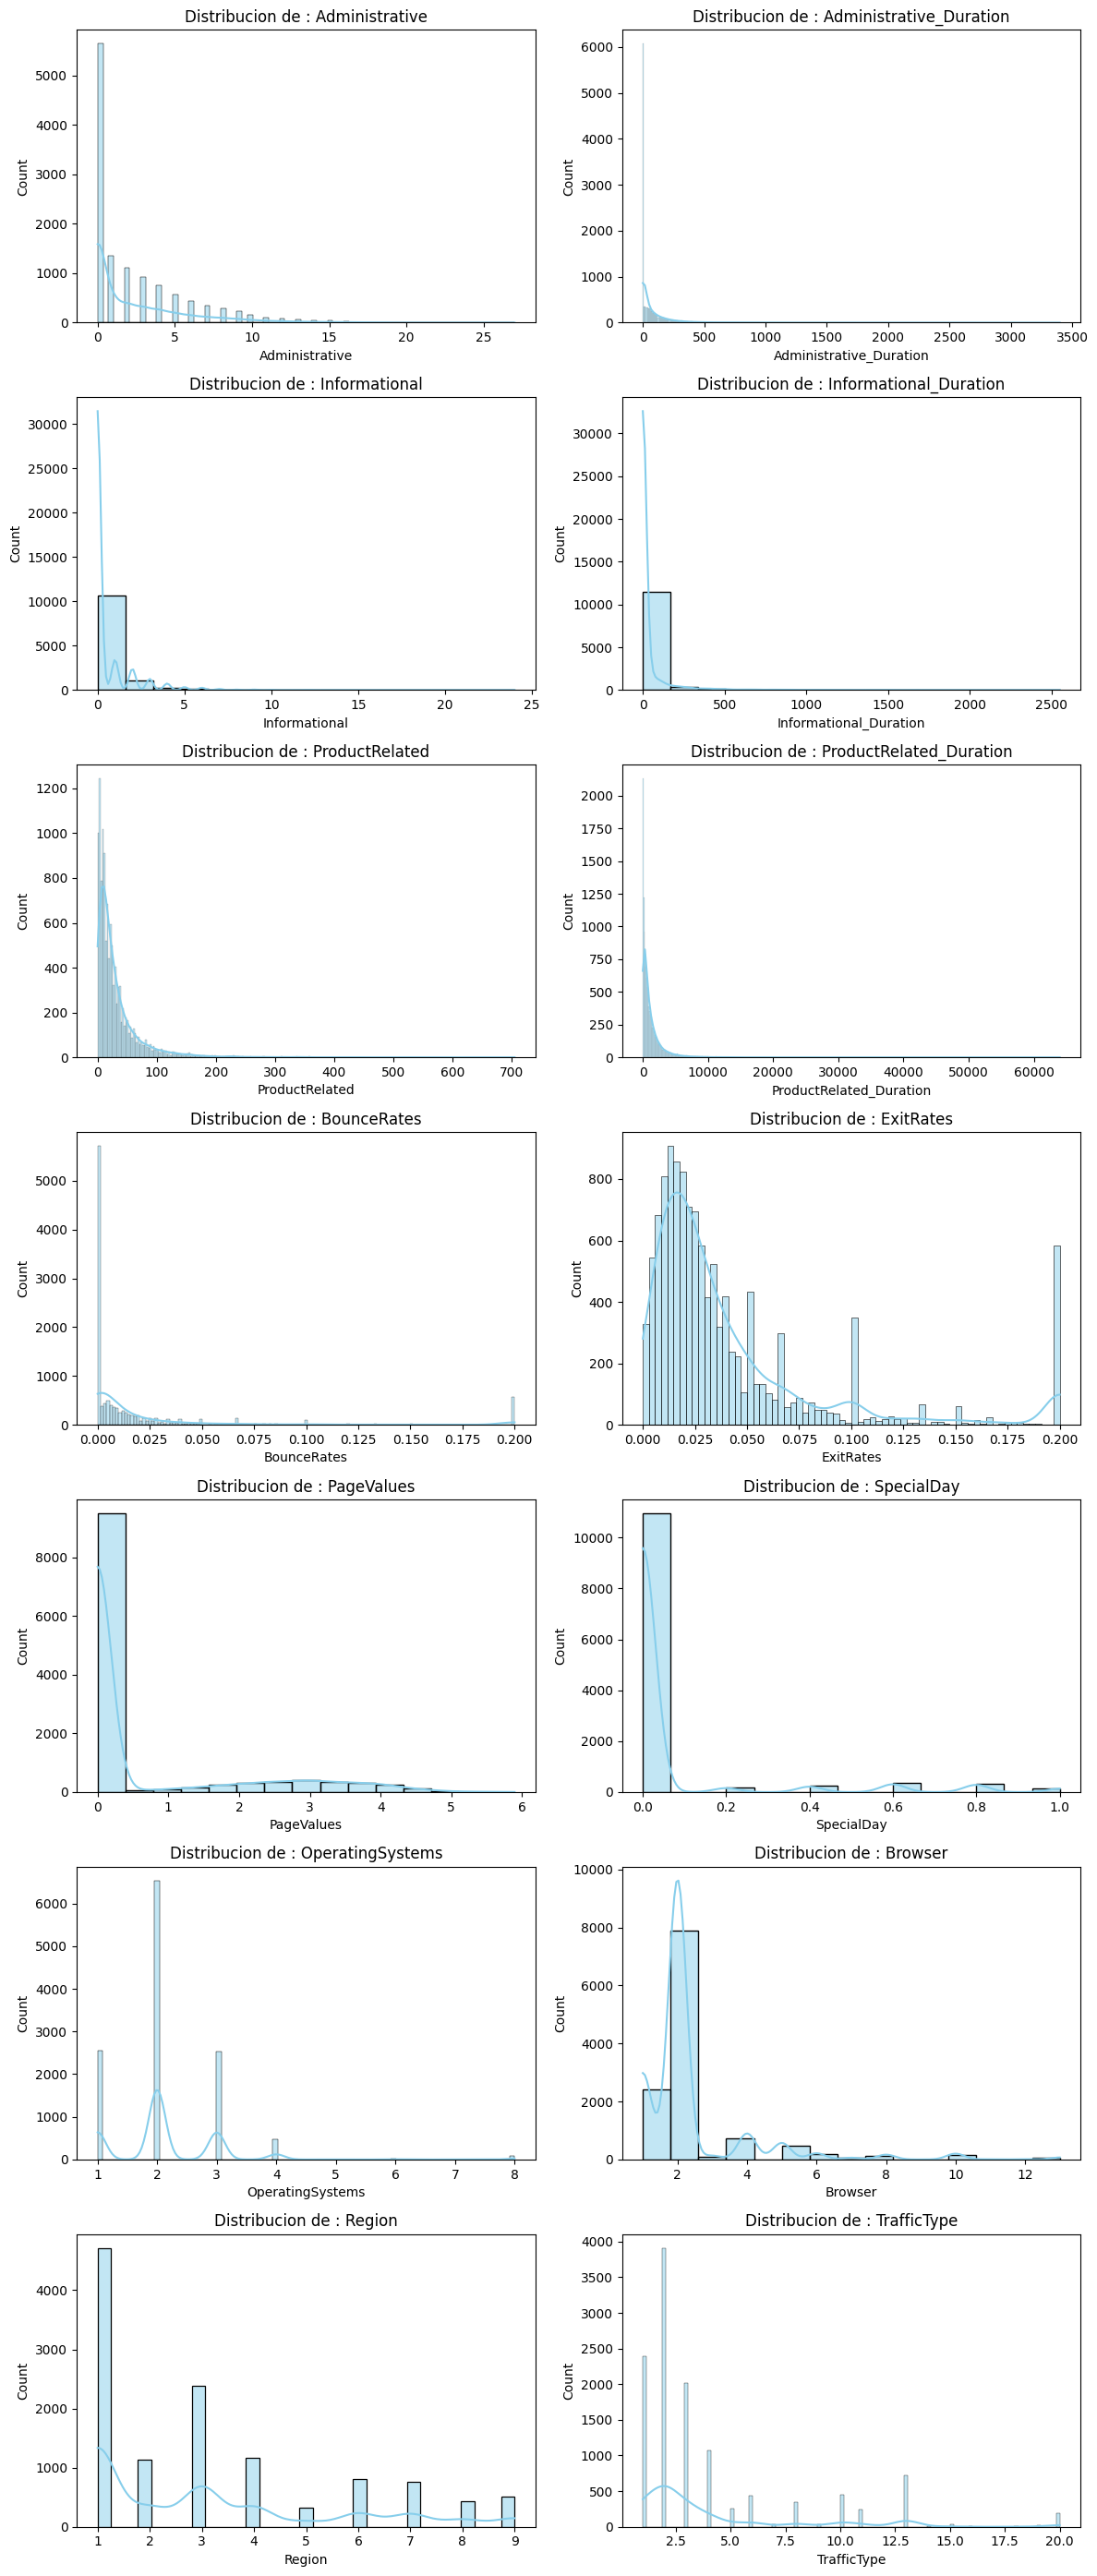

In [77]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.to_list()

fig, axes = plt.subplots(7, 2, figsize=(12 , 7 * 4))
axes = axes.flatten()

for i, c  in enumerate(numeric_cols):
    sns.histplot(df[c], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribucion de : {c}')

plt.tight_layout()
plt.show()

In [78]:
df.to_csv('../data/online_shoppers_cln.csv', index=False)